In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [3]:
def init_params():
    W1 = np.random.rand(10, 784) - .5
    b1 = np.random.rand(10, 1) - .5
    W2 = np.random.rand(10, 10) - .5
    b2 = np.random.rand(10, 1) - .5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backwards_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * (dZ2.dot(A1.T))
    db2 = 1 / m * (np.sum(dZ2, 1))
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * (dZ1.dot(X.T))
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10, 1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10, 1))
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/ Y.size

def gradient_descent(X, Y, alpha, iterations):
    size , m = X.shape
    
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwards_propagation(X, Y, A1, A2, W2, Z1, m)
        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)
        if (i + 1) % int(iterations/10) == 0:
            print(f"Iteration: {i + 1} / {iterations}")
            prediction = get_predictions(A2)
            print(f"{get_accuracy(prediction, Y): .3%}")
    return W1, b1, W2, b2
    

In [4]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, .15, 300)

Iteration: 30 / 300
 53.239%
Iteration: 60 / 300
 62.437%
Iteration: 90 / 300
 72.976%
Iteration: 120 / 300
 77.871%
Iteration: 150 / 300
 80.863%
Iteration: 180 / 300
 82.700%
Iteration: 210 / 300
 83.893%
Iteration: 240 / 300
 84.846%
Iteration: 270 / 300
 85.659%
Iteration: 300 / 300
 86.332%


In [5]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions
    
def show_predictions(index, W1, b1, W2, b2):
    vector_X = X_train[:, index, None]
    prediction = make_predictions(vector_X, W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")
    
    vector_X = vector_X.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(vector_X, interpolation = 'nearest')
    plt.show()

Prediction: [5]
Label: 5


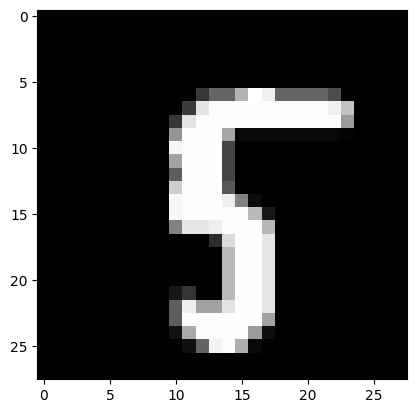

Prediction: [7]
Label: 7


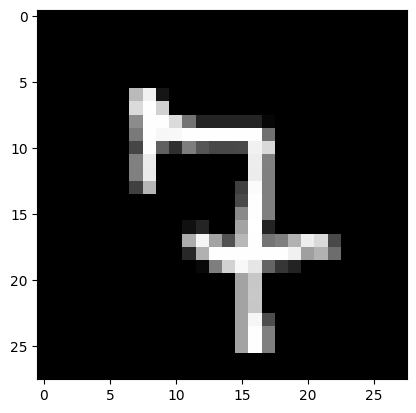

Prediction: [3]
Label: 3


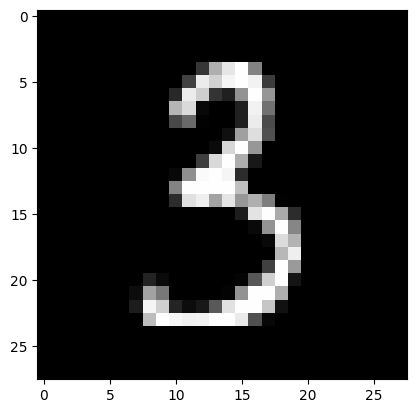

Prediction: [2]
Label: 2


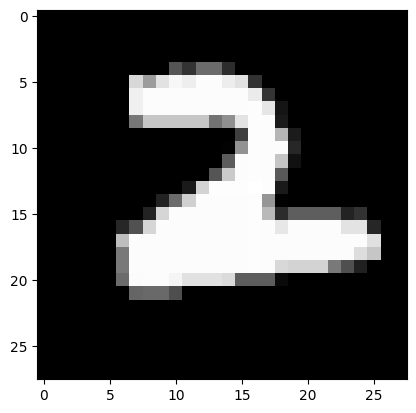

Prediction: [4]
Label: 4


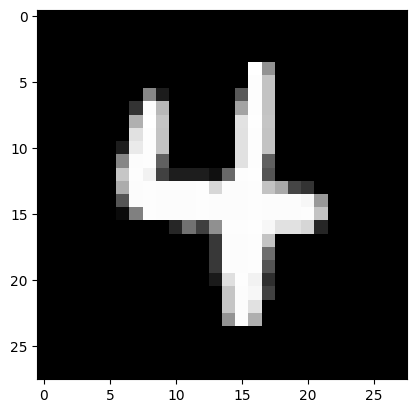

In [6]:
show_predictions(0, W1, b1, W2, b2)
show_predictions(1, W1, b1, W2, b2)
show_predictions(100, W1, b1, W2, b2)
show_predictions(200, W1, b1, W2, b2)
show_predictions(300, W1, b1, W2, b2)

In [7]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.856